# Motor Trend Car Road Analysis

## Executive Summary

You work for Motor Trend, a magazine about the automobile industry. Looking at a data set of a collection of cars, they are interested in exploring the relationship between a set of variables and miles per gallon (MPG) (outcome). They are particularly interested in the following two questions:

“Is an automatic or manual transmission better for MPG”
“Quantify the MPG difference between automatic and manual transmissions”

In [86]:
#obtain the data
library(datasets)
data(mtcars)

## Understanding data and EDA

In [87]:
names(mtcars)
summary(cars)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [88]:
cor(mtcars$mpg,mtcars[,-1])

cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
-0.852162,-0.8475514,-0.7761684,0.6811719,-0.8676594,0.418684,0.6640389,0.5998324,0.4802848,-0.5509251


In [89]:
mtcars$cyl <- factor(mtcars$cyl)
mtcars$vs <- factor(mtcars$vs)
mtcars$gear <- factor(mtcars$gear)
mtcars$carb <- factor(mtcars$carb)
mtcars$am <- factor(mtcars$am,labels=c('Automatic','Manual'))

In [90]:
c(mean(subset(mtcars, mtcars$am=="Automatic")$mpg), 
  mean(subset(mtcars, mtcars$am=="Manual")$mpg))

[1] 17.14737 24.39231

## 1. Is an automatic or manual transmission better for MPG?

Null-hypothesis = there is no difference in MPG usage for different transmission method.

Alternative hypothesis = there is difference in MPG usage for different transmission method.

In [91]:
t.test(mtcars$mpg~mtcars$am)


	Welch Two Sample t-test

data:  mtcars$mpg by mtcars$am
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean in group Automatic    mean in group Manual 
               17.14737                24.39231 


Based on the results, p-value = 0.001374<0.05, we may reject the null hypothesis that there is no difference between MPG usage between the different transmission methods, and conclude, that automatic transmission cars have lower mpg compared with manual transmission cars, with assumption that all other conditions remain unchanged.


Furthermore, checking mean of mpg in Automatic (at 17.1) and Manual (at 24.4), conclusion is that the Manual transmission is better for MPG; keeping all other factors constant.

### Final Answer for Q1

Manual transmission is better for MPG; keeping all other factors constant.

## 2. Quantify the MPG difference between automatic and manual transmissions

The aim here is to quantify the MPG difference between transmission types, and find if there are other variables that account for the MPG differences.

In [92]:
stepmodel = step(lm(data = mtcars, mpg ~ .),trace=0,steps=10000)
summary(stepmodel)


Call:
lm(formula = mpg ~ cyl + hp + wt + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9387 -1.2560 -0.4013  1.1253  5.0513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.70832    2.60489  12.940 7.73e-13 ***
cyl6        -3.03134    1.40728  -2.154  0.04068 *  
cyl8        -2.16368    2.28425  -0.947  0.35225    
hp          -0.03211    0.01369  -2.345  0.02693 *  
wt          -2.49683    0.88559  -2.819  0.00908 ** 
amManual     1.80921    1.39630   1.296  0.20646    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.41 on 26 degrees of freedom
Multiple R-squared:  0.8659,	Adjusted R-squared:  0.8401 
F-statistic: 33.57 on 5 and 26 DF,  p-value: 1.506e-10


About 84% (by adjusted R-squared as that penalizes for too many variables and normalizes the variance) of the variance is explained by this model. Cylinders cyl6 and cyl8 both have a negative relation with mpg (-3.03 miles and -2.16 miles for cyl6 and cyl8 respectively).

Similarly, horsepower (hp) sees a negative relation wrt mpg i.e. (-0.03miles), and weight (wt) shows -2.5miles (for every 1,000lb). 

However, amManual has a value of 1.80921 mpg , thus indicating the magnitude by which manual transmission is better than automatic transmission.

### Final result for Q2

Manual transmission is 1.81 mpg better than Automatic transmission

### Additional exercise on Q2

### Improvement in model for Q2

In [93]:
model <- lm(mpg~ factor(am):wt + factor(am):qsec,data=mtcars)
summary(model)


Call:
lm(formula = mpg ~ factor(am):wt + factor(am):qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9361 -1.4017 -0.1551  1.2695  3.8862 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               13.9692     5.7756   2.419  0.02259 *  
factor(am)Automatic:wt    -3.1759     0.6362  -4.992 3.11e-05 ***
factor(am)Manual:wt       -6.0992     0.9685  -6.297 9.70e-07 ***
factor(am)Automatic:qsec   0.8338     0.2602   3.205  0.00346 ** 
factor(am)Manual:qsec      1.4464     0.2692   5.373 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.097 on 27 degrees of freedom
Multiple R-squared:  0.8946,	Adjusted R-squared:  0.879 
F-statistic: 57.28 on 4 and 27 DF,  p-value: 8.424e-13


##### Observation 1
Observation is that this model has an adjusted R-squared of 87.9% ( or 89.5%)


From the coeff values, we have the following conclusions:

##### Observation 2
As the weight increased by 1000 lbs, the mpg decreased by -3.176 for automatic transmission, and -6.09 for manual transmission.
##### Conclusion 2: with increasing car weight we should choose manual transmission cars

##### Observation 3
when the acceleration speed dropped, and 1/4 mile time increased (by 1 sec), the mpg factor increased by 0.834 miles for automatic transmission cars, and 1.446 miles for manual transmission cars

##### Conclusion 2: With lower acceleration speed, but same weight, manual transmission cars are better for mpg

## Appendix

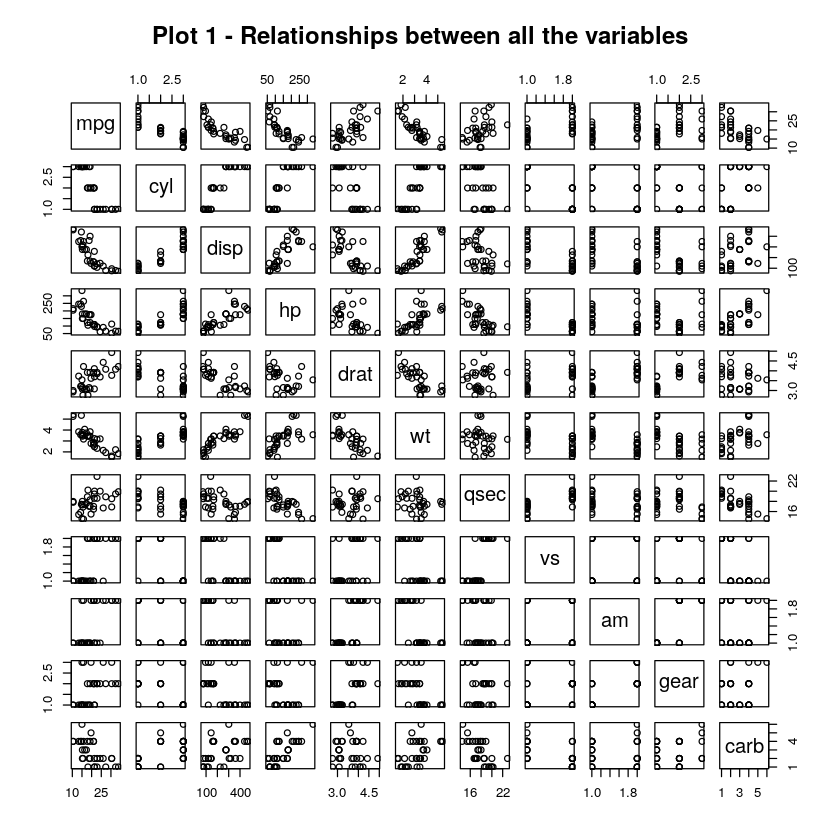

In [94]:
#checking correlation of all variables
pairs(mpg ~ ., data = mtcars, main="Plot 1 - Relationships between all the variables")

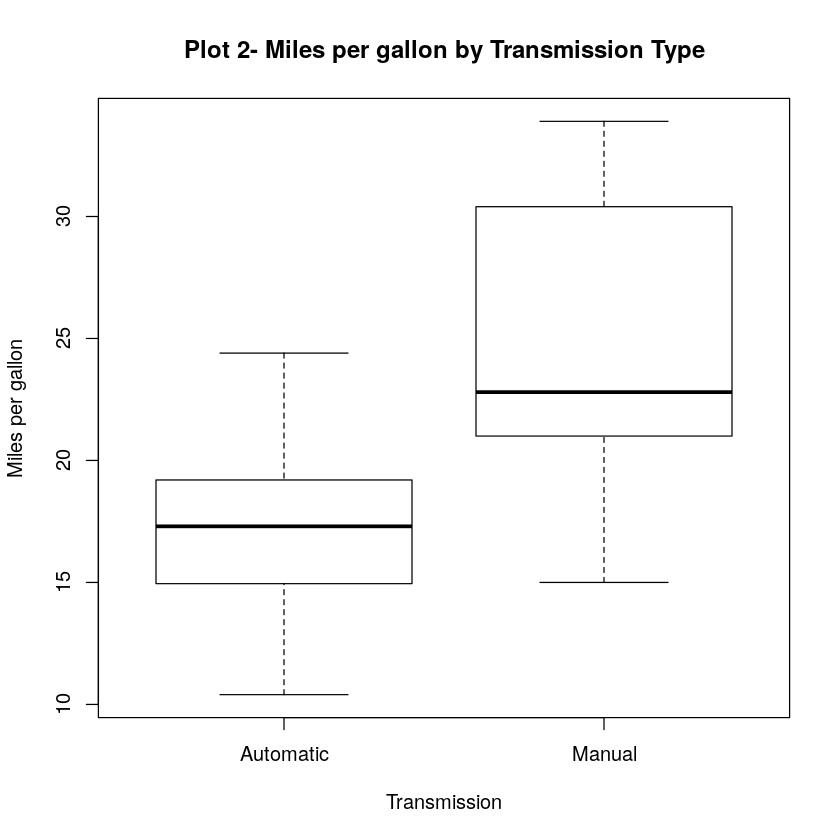

In [95]:
#Checking the boxplots for mpg by transmission type

boxplot(mpg ~ am, data = mtcars, xlab = "Transmission", ylab = "Miles per gallon", main="Plot 2- Miles per gallon by Transmission Type")

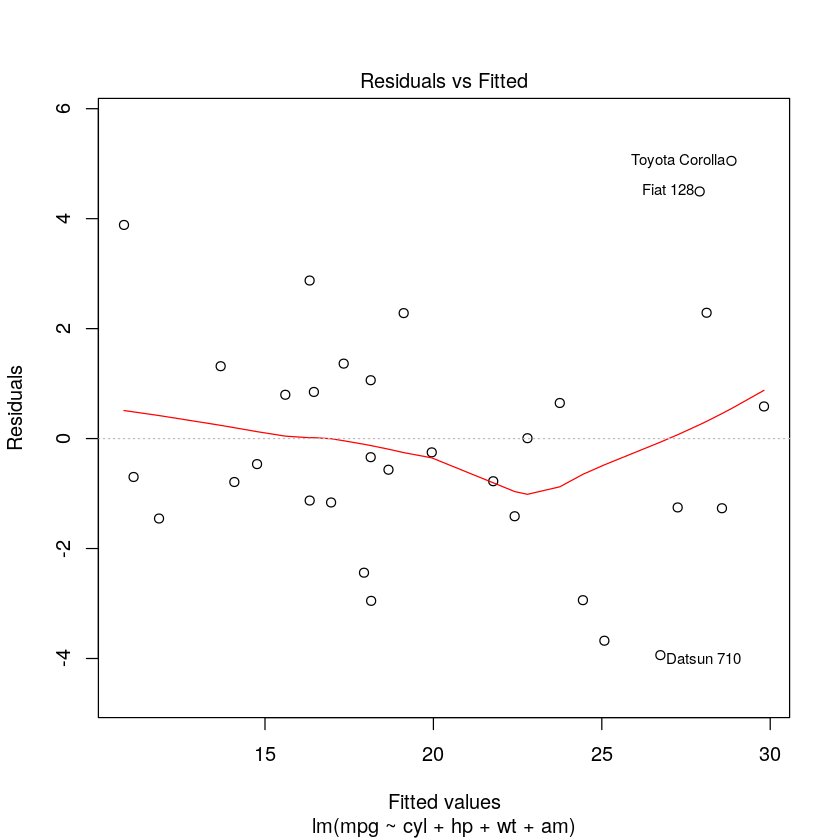

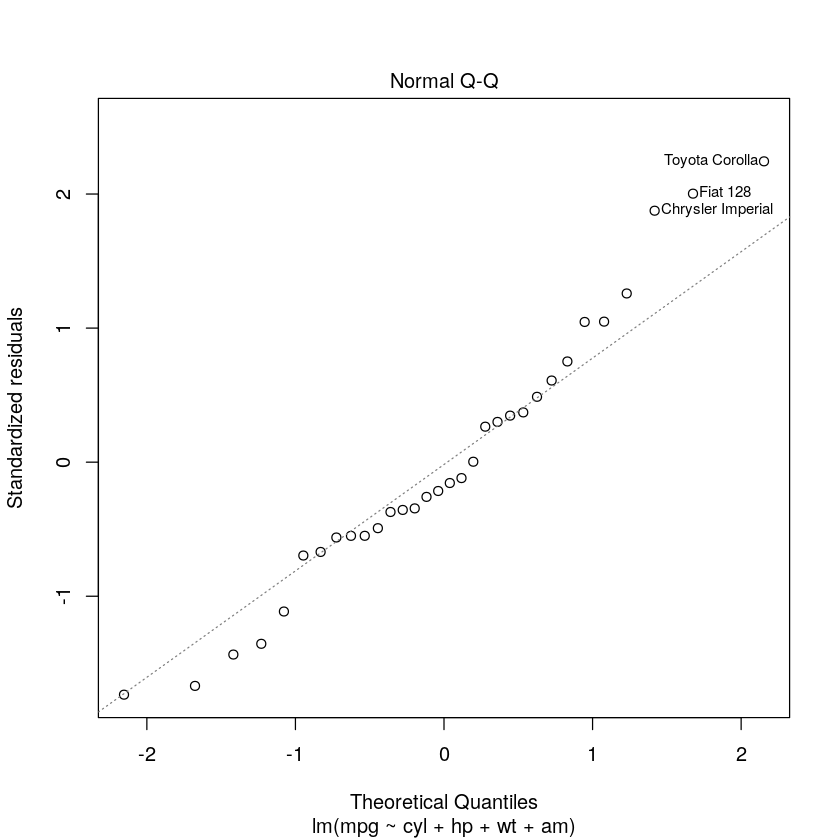

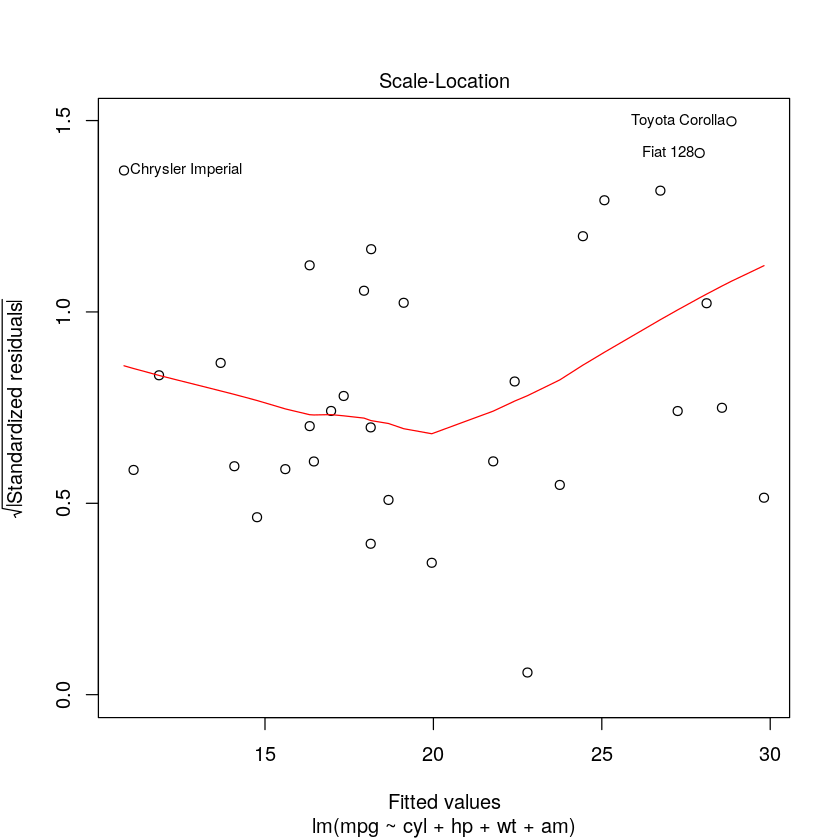

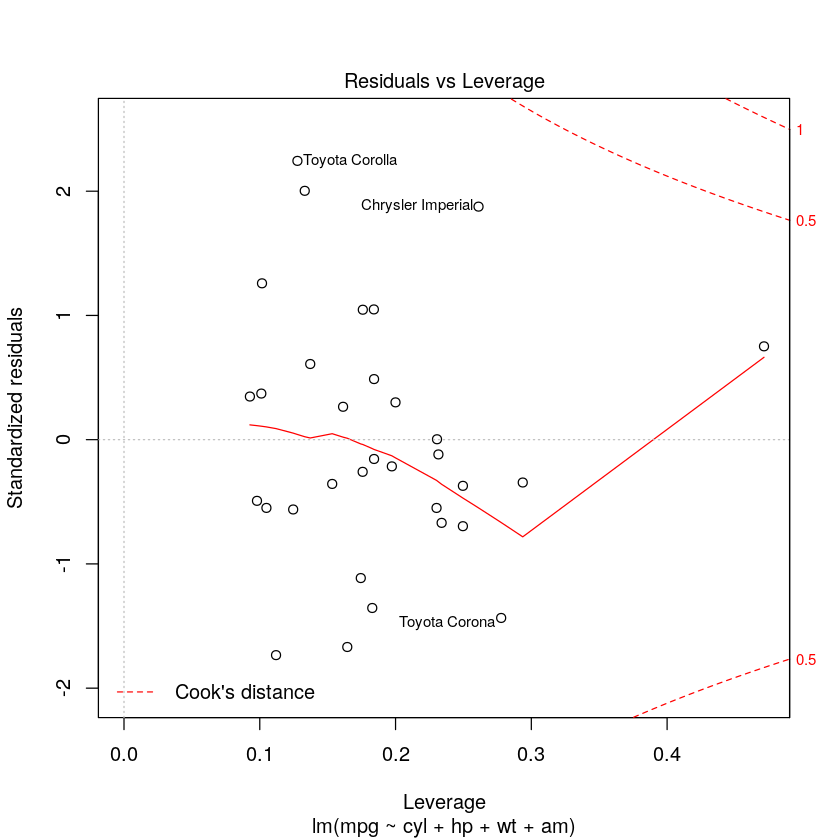

In [96]:
#plotting the model results
plot(stepmodel)